In [1]:
import numpy
import scipy.special
import matplotlib.pyplot


class neuralNetwork:
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        self.inode = inputnodes
        self.hnode = hiddennodes
        self.onode = outputnodes

        self.wih = numpy.random.normal(0.0,pow(self.hnode,-0.5),(self.hnode,self.inode))
        self.who = numpy.random.normal(0.0,pow(self.onode,-0.5),(self.onode,self.hnode))

        self.lr=learningrate

        self.activation_function = lambda x:scipy.special.expit(x)

        pass
    def train(self,inputs_list,targets_list):
        inputs = numpy.array(inputs_list,ndmin=2).T
        targets = numpy.array(targets_list,ndmin=2).T

        hidden_inputs = numpy.dot(self.wih,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = numpy.dot(self.who,hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T,output_errors)

        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)),numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),numpy.transpose(inputs))

        pass
    def query(self,inputs_list):
        inputs = numpy.array(inputs_list,ndmin=2).T

        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.3

n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

train_data_file = open("C:/Users/12556/Desktop/Genesis Neuro/mnist_dataset/mnist_train_100.csv","r")
train_data_list = train_data_file.readlines()
train_data_file.close()

for record in train_data_list:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes)+0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs,targets)
        pass


    

In [2]:
train_data_file = open("C:/Users/12556/Desktop/Genesis_Neuro/mnist_dataset/mnist_train_100.csv","r")
train_data_list = train_data_file.readlines()
train_data_file.close()

In [10]:
test_data_file = open("C:/Users/12556/Desktop/Genesis_Neuro/mnist_dataset/mnist_test_10.csv",'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [11]:
all_value=test_data_list[0].split(',')
print (all_value[0])

7


In [13]:
import numpy
import matplotlib.pyplot
%matplotlib inline

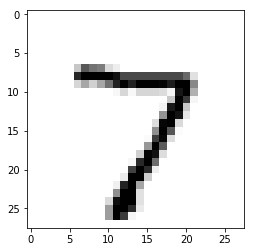

In [15]:
image_array = numpy.asfarray(all_value[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array,cmap='Greys',interpolation='None')

In [21]:
n.query((numpy.asfarray(all_value[1:])/255 * 0.99)+0.01)


array([[0.03999792],
       [0.02094242],
       [0.01902188],
       [0.10519693],
       [0.05635917],
       [0.03079457],
       [0.00561038],
       [0.88594387],
       [0.10269173],
       [0.02496893]])